<a href="https://colab.research.google.com/github/seanyoungsean/DSAI/blob/main/CardiovascularDiseasePrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [86]:
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
data = pd.DataFrame()
with open('/content/drive/My Drive/Colab Notebooks/assets/CardiovascularDisease/cardio_train.csv') as f:
  data = pd.read_csv(f, sep=";")
drive.flush_and_unmount()

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [4]:

#filePath = '/content/Cardiovascular_Disease/cardio_train.csv'
#data = pd.read_csv(filePath, sep=";")

data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (70000, 13)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
data.nunique(axis=0)# returns the number of unique values for each variable.

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [7]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Display the Missing Values

print(data.isna().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [9]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

**Preparing data**

In [88]:
data['age'] = round(data['age']/365, 2)

In [89]:
data['BMI'] = data['weight']/(pow(data['height']/100,2))

In [90]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.39,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.42,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.66,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.28,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.87,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.71,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.92,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.24,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.45,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


**3. Exploratory Data Analysis**

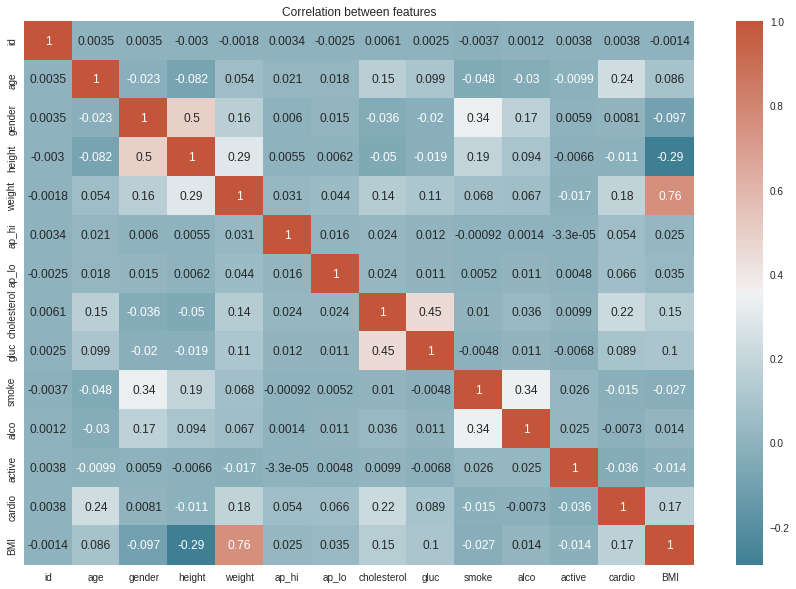

In [85]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation between features');
# sns.heatmap(corr, xticklabels=corr.columns,
#             yticklabels=corr.columns, 
#             annot=True,
#             cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [93]:
y = pd.DataFrame(data['cardio']).values
X = pd.DataFrame(data[data.columns.difference(['cardio'])]).values

In [94]:
# ravel() flatens the array of (70000,1) to (70000,)
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),
                                                    test_size = 0.2,
                                                    random_state = 42)

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Logistic Regression**

In [96]:
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---

In [97]:
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_lr))

.:. Logistic Regression Accuracy: 71.90% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000




.: Performance Evaluation
**************************


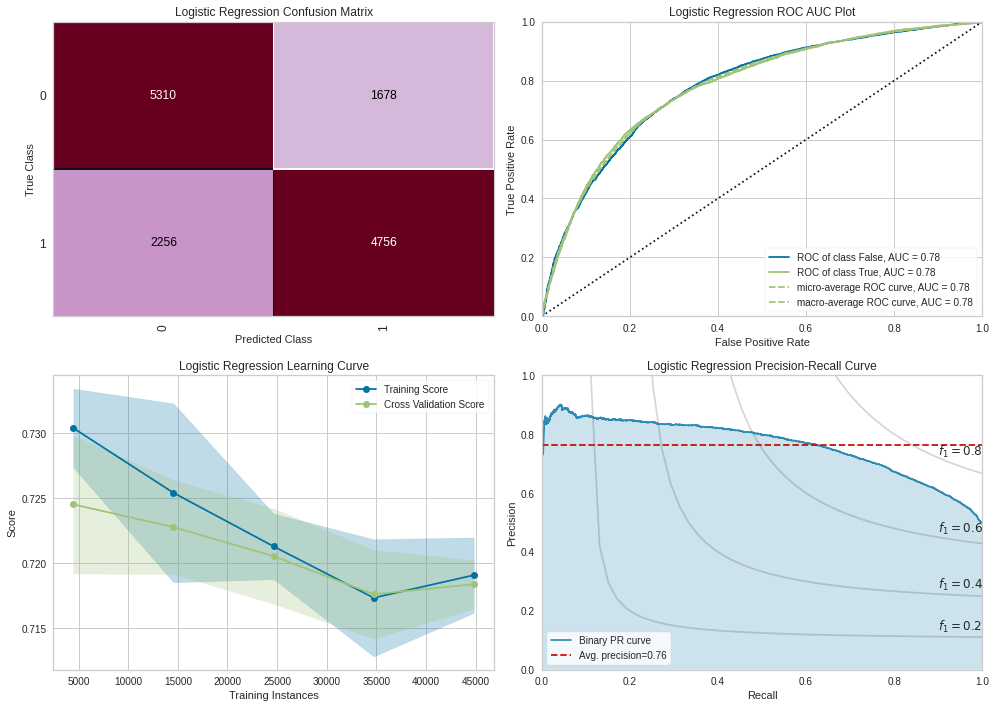

In [98]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(classifier_lr, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(classifier_lr, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(X_train, y_train)
logrocauc.score(X_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(classifier_lr, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(classifier_lr, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(X_train, y_train)
logcurve.score(X_test, y_test)
logcurve.finalize()

plt.tight_layout();

**Random Forest**

In [99]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

In [100]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

.:. Random Forest Accuracy: 73.21% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      6988
           1       0.78      0.65      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000




.: Performance Evaluation
**************************


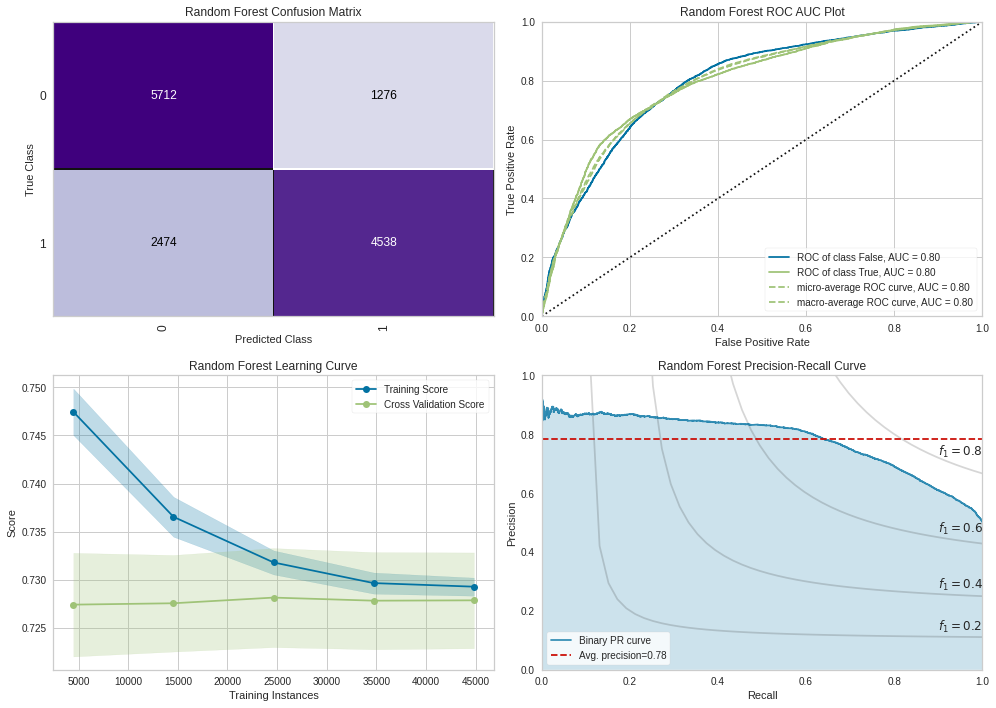

In [103]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='Purples',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(X_train, y_train)
rccrocauc.score(X_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [104]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression','Random Forest'], 
                        'Accuracy': [acc_lr*100, RFAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,73.214286
Logistic Regression,71.900000
